In [1]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
mist= keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
training_images=training_images/255.0
test_images=test_images/255.0

In [4]:
model= keras.models.Sequential([
  keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  keras.layers.MaxPooling2D(2, 2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [7]:
history=model.fit(training_images, training_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 71s 37ms/step - loss: 0.1333 - accuracy: 0.9606 - val_loss: 0.0747 - val_accuracy: 0.9749
Epoch 2/10
1875/1875 [==============================] - 84s 45ms/step - loss: 0.0455 - accuracy: 0.9855 - val_loss: 0.0479 - val_accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 94s 50ms/step - loss: 0.0276 - accuracy: 0.9915 - val_loss: 0.0466 - val_accuracy: 0.9853
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0164 - accuracy: 0.9948 - val_loss: 0.0416 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 79s 42ms/step - loss: 0.0123 - accuracy: 0.9959 - val_loss: 0.0547 - val_accuracy: 0.9856
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.0469 - val_accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0060 - accuracy: 0.9980 - val_loss: 0.0651 -

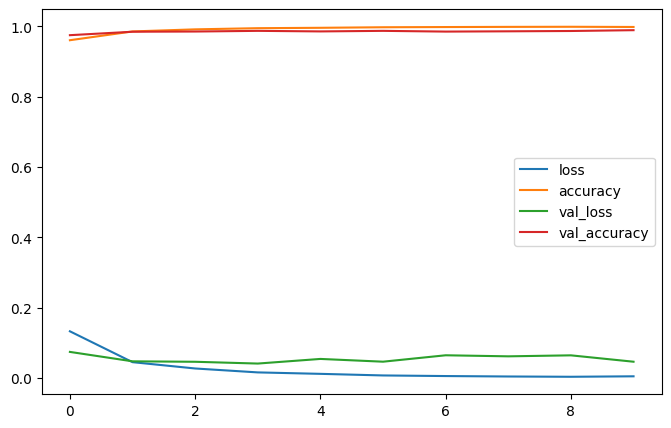

In [8]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.show()

In [9]:
loss, accuracy = model.evaluate(training_images, training_labels)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9891
0.046770282089710236
0.9890999794006348


In [10]:
loss, accuracy = model.evaluate(test_images, test_labels)
print(loss)
print(accuracy)

313/313 [==============================] - 2s 7ms/step - loss: 0.0468 - accuracy: 0.9891
0.046770282089710236
0.9890999794006348


In [11]:
index=1
print(f'Label: {test_labels[index]}')
Classification=model.predict(test_images[index:index+1])
print(f'Classification:\n{Classification.reshape(-1,1)}')


Label: 2
1/1 [==============================] - 0s 123ms/step
Classification:
[[5.3651739e-13]
 [1.9580609e-12]
 [1.0000000e+00]
 [7.5833242e-22]
 [7.0638201e-16]
 [1.6268950e-19]
 [1.1452834e-12]
 [1.4351493e-19]
 [9.7243624e-17]
 [2.0555157e-13]]


In [12]:
print(test_labels[:30])

[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1]


In [13]:
FIRST_NAME=3
SECOND_IMAGE=10
THIRD_IMAGE=25

print(test_labels[FIRST_NAME])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

0
0
0


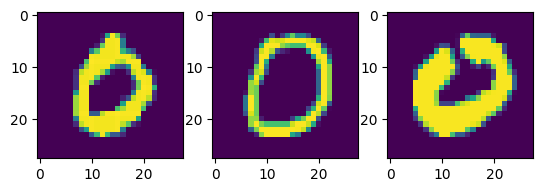

In [14]:
f, axarr= plt.subplots(1,3)
axarr[0].imshow(test_images[FIRST_NAME])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [15]:
layer=0
filter1=0
filter2=10

layer_outputs=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 23ms/step


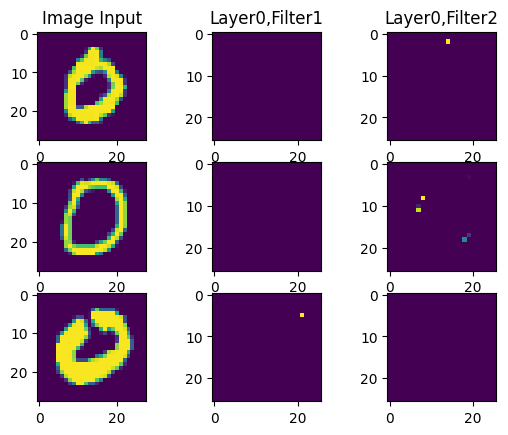

In [16]:
f, axarr= plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_NAME])
f1=activation_model.predict(test_images[FIRST_NAME].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+str(layer)+",Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+str(layer)+",Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
F2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(F2[0,:,:,filter1])
axarr[1,2].imshow(F2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
F3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(F3[0,:,:,filter1])
axarr[2,2].imshow(F3[0,:,:,filter2])

In [17]:
FIRST_NAME=2
SECOND_IMAGE=5
THIRD_IMAGE=14


In [18]:
print(test_labels[FIRST_NAME])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

1
1
1


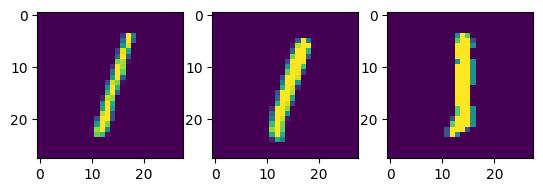

In [21]:
f, axarr= plt.subplots(1,3)
axarr[0].imshow(test_images[FIRST_NAME])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [22]:
layer=0
filter1=0
filter2=10

layer_outputs=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 19ms/step


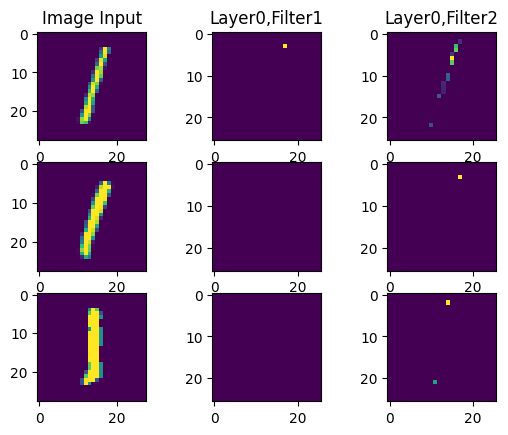

In [23]:
f, axarr= plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_NAME])
f1=activation_model.predict(test_images[FIRST_NAME].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+str(layer)+",Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+str(layer)+",Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
F2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(F2[0,:,:,filter1])
axarr[1,2].imshow(F2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
F3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(F3[0,:,:,filter1])
axarr[2,2].imshow(F3[0,:,:,filter2])

In [24]:
FIRST_NAME=0
SECOND_IMAGE=17
THIRD_IMAGE=26


In [25]:
print(test_labels[FIRST_NAME])
print(test_labels[SECOND_IMAGE])
print(test_labels[THIRD_IMAGE])

7
7
7


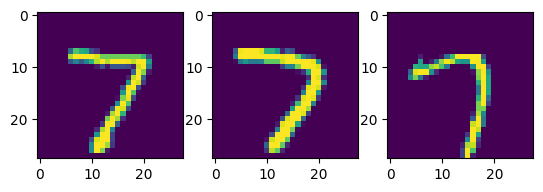

In [26]:
f, axarr= plt.subplots(1,3)
axarr[0].imshow(test_images[FIRST_NAME])
axarr[1].imshow(test_images[SECOND_IMAGE])
axarr[2].imshow(test_images[THIRD_IMAGE])

In [27]:
layer=0
filter1=0
filter2=10

layer_outputs=[layer.output for layer in model.layers]
activation_model=keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 33ms/step


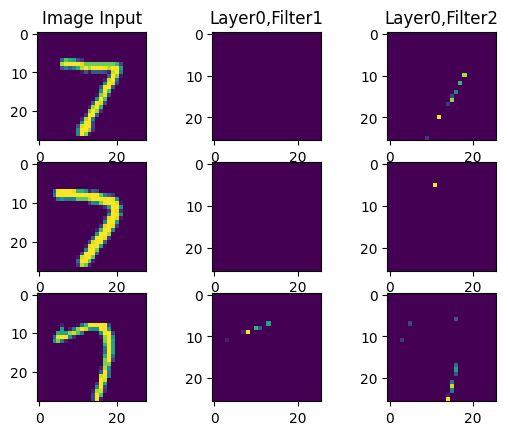

In [28]:
f, axarr= plt.subplots(3,3)

axarr[0,0].set_title('Image Input')
axarr[0,0].imshow(test_images[FIRST_NAME])
f1=activation_model.predict(test_images[FIRST_NAME].reshape(1,28,28,1))[layer]
axarr[0,1].set_title('Layer'+str(layer)+",Filter1")
axarr[0,1].imshow(f1[0,:,:,filter1])
axarr[0,2].set_title('Layer'+str(layer)+",Filter2")
axarr[0,2].imshow(f1[0,:,:,filter2])

axarr[1,0].imshow(test_images[SECOND_IMAGE])
F2=activation_model.predict(test_images[SECOND_IMAGE].reshape(1,28,28,1))[layer]
axarr[1,1].imshow(F2[0,:,:,filter1])
axarr[1,2].imshow(F2[0,:,:,filter2])

axarr[2,0].imshow(test_images[THIRD_IMAGE])
F3=activation_model.predict(test_images[THIRD_IMAGE].reshape(1,28,28,1))[layer]
axarr[2,1].imshow(F3[0,:,:,filter1])
axarr[2,2].imshow(F3[0,:,:,filter2])